In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [34]:
import os
current_dir = os.getcwd()
print(current_dir)

C:\Users\Dell\Desktop\MyPython\Yandex.Practica\ПРЕДЛОЖЕНИЯ\Школьники\Работа_над_материалами\Тема_5


In [35]:
import warnings
warnings.filterwarnings('ignore')

# задача 0

In [1]:
import pandas as pd
import scipy.stats as ss

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [7]:
PATH_OUT = r'C:\Users\Dell\Desktop\MyPython\Школьники\Текущие материалы\Материалы\Тема_5'

In [8]:
df = pd.read_csv(PATH_OUT + '\\tren_sech.csv',sep=';', encoding='cp1251', skipinitialspace=True, decimal=',')
df = df.dropna()  # удалили строки с пропусками
df.head(6)

,Наличие_пробоин,Тип_космолёта
0,нет,Венатор
1,нет,Венатор
2,нет,Дредноут
3,нет,Венатор
4,нет,Венатор
5,нет,Корвет_С90


In [8]:
import pandas as pd
import scipy.stats as ss

factor_1 = df['Тип_космолёта']
factor_2 = df['Наличие_пробоин']

cross_matrix = pd.crosstab(factor_1, factor_2)
print(cross_matrix.T)

Тип_космолёта    Венатор  Дредноут  Корвет_С90
Наличие_пробоин                               
да                     5         2           4
нет                   33         8          14


In [9]:
chi = ss.chi2_contingency(cross_matrix, correction=True)                
print('p-уровень: ', chi[1])

p-уровень:  0.6646989466527534


## Задача 1

In [10]:
PATH_OUT = r'C:\Users\Dell\Desktop\MyPython\Yandex.Practica\ПРЕДЛОЖЕНИЯ\Школьники\Работа_над_материалами\Тема_5'

In [11]:
df = pd.read_csv(PATH_OUT + '\\t_54.csv',sep=';', encoding='cp1251', skipinitialspace=True, decimal=',')
df = df.dropna()  # удалили строки с пропусками
df.head(6)

,время_до,время_после,регион
0,237,240,Северо-запад
1,214,215,Северо-запад
2,202,194,Северо-запад
3,240,229,Северо-запад
4,192,187,Северо-запад
5,221,223,Северо-запад


In [12]:
from operator import itemgetter
from scipy.stats import mannwhitneyu


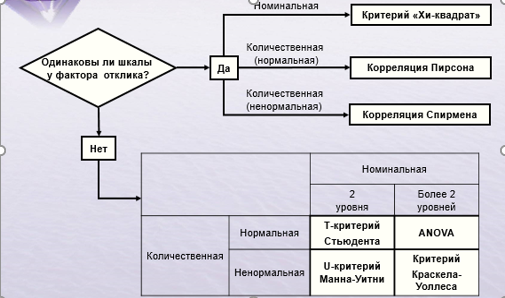

In [13]:
dd = df.copy()


grp = dd['регион'].unique()
numeric_columns = ['время_до', 'время_после']
g1 = []
g2 = []
m_test = []

for i in range(0, len(grp)):
    g1 = dd[dd['регион'] == grp[i]][numeric_columns[0]]
    g2 = dd[dd['регион'] == grp[i]][numeric_columns[1]]
    m_test.append([grp[i], round(mannwhitneyu(g1, g2, alternative='two-sided')[1], 4)])

m_test.sort(key=itemgetter(len(m_test[0]) - 1), reverse=False)
m_test.insert(0, ['регион', 'р-уровень'])
    
print(m_test)

[['регион', 'р-уровень'], ['Центр', 0.004], ['Урал', 0.0094], ['Северо-запад', 0.5067]]


## Задача 2

В программе необходимо учесть:

Если данные в обеих группах распределены нормально, то для сравнения использовать метод Стьюдент с различной дисперсией. Если хотя бы в одной группе - не нормальное распределение, то для сравнения использовать метод Манн-Уитни. Для проверки на нормальность использовать метод Шапиро c уровнем принятия решения 0.05.
Результат вывести в виде списка списков. Первый список - названия выводимых результатов: ['показатель', 'р-уровень', 'метод расчёта']. Остальные списки - расчёты по каждому фактору.
Значение р-уровня округлить до 4 знака.
Для расчёта использовать библиотеку scipy.stats
Выходной список списков отсортировать по значению р-уровню в порядке убывания

In [14]:
df = pd.read_csv(PATH_OUT + '\\t5.csv',sep=';', encoding='cp1251', skipinitialspace=True, decimal=',')
df.head(8)

,group,"S, мм.кв","Av, мДж/с","X, мм","Y, мм","V, мм/с"
0,group_1,87.4,37.60,1.7,22.6,5.8
1,group_1,44.5,42.44,1.2,22.4,5.2
2,group_1,227.5,95.80,4.0,24.5,11.2
3,group_1,83.3,32.94,1.2,24.6,6.4
4,group_1,122.3,188.92,2.3,24.0,13.2
5,group_1,646.8,106.56,5.2,28.4,9.8
6,group_1,352.3,79.00,2.7,27.6,11.2
7,group_1,45.1,48.81,1.1,22.8,5.5


In [15]:
from operator import itemgetter
from scipy.stats import mannwhitneyu, ttest_ind, shapiro

In [16]:
dd = df.copy()

grp = dd['group'].unique()
numeric_columns = dd.select_dtypes(exclude=[object]).columns

g1 = []
g2 = []    
m_test = []

for i in range(0, len(numeric_columns)):
    g1 = dd[dd['group'] == grp[0]][numeric_columns[i]]
    g2 = dd[dd['group'] == grp[1]][numeric_columns[i]]
    if ((shapiro(g1)[1] >= 0.05) and (shapiro(g2)[1] >= 0.05)):
        _, plev = ttest_ind(g1, g2, equal_var=False) 
        metod = 'Стьюдент'
    else:
        _, plev = mannwhitneyu(g1, g2, alternative='two-sided')
        metod = 'Манн-Уитни'
    m_test.append([numeric_columns[i], round(plev, 4), metod])

print(m_test)

m_test.sort(key=itemgetter(len(m_test[0]) - 2), reverse=False)
m_test.insert(0, ['показатель', 'р-уровень', 'метод расчёта'])        

print(m_test)

[['S, мм.кв', 0.9123, 'Манн-Уитни'], ['Av, мДж/с', 0.202, 'Манн-Уитни'], ['X, мм', 0.9927, 'Манн-Уитни'], ['Y, мм ', 0.6069, 'Манн-Уитни'], ['V, мм/с', 0.2019, 'Манн-Уитни']]
[['показатель', 'р-уровень', 'метод расчёта'], ['V, мм/с', 0.2019, 'Манн-Уитни'], ['Av, мДж/с', 0.202, 'Манн-Уитни'], ['Y, мм ', 0.6069, 'Манн-Уитни'], ['S, мм.кв', 0.9123, 'Манн-Уитни'], ['X, мм', 0.9927, 'Манн-Уитни']]


In [17]:
m_test

[['показатель', 'р-уровень', 'метод расчёта'],
 ['V, мм/с', 0.2019, 'Манн-Уитни'],
 ['Av, мДж/с', 0.202, 'Манн-Уитни'],
 ['Y, мм ', 0.6069, 'Манн-Уитни'],
 ['S, мм.кв', 0.9123, 'Манн-Уитни'],
 ['X, мм', 0.9927, 'Манн-Уитни']]

### Дополнительно

## Задача 3

In [18]:
df = pd.read_csv(PATH_OUT + '\\t_51.csv',sep=';', encoding='cp1251', skipinitialspace=True)
df.head(3)

,вид_зондирования,"время_зондирования, сек",тип_осложнения_1,тип_осложнения_2,тип_осложнения_3,тип_осложнения_4
0,Классическое,69,да,да,да,да
1,Классическое,78,да,да,да,да
2,Классическое,81,да,да,да,да


In [19]:
from operator import itemgetter
import scipy.stats as ss

In [20]:
dd = df.copy()

nominal_columns = ['тип_осложнения_1', 'тип_осложнения_2', 'тип_осложнения_3', 'тип_осложнения_4']
group = 'вид_зондирования'
grp = dd[group].unique()

chi2 = []

for i in range(0, len(nominal_columns)):
    grp = dd[group].unique()
    cross_matrix = pd.crosstab(dd[group], dd[nominal_columns[i]])
    chi = ss.chi2_contingency(cross_matrix, correction=True)                
    chi2.append([nominal_columns[i], round(chi[1], 4)])

chi2.sort(key=itemgetter(len(chi2[0]) - 1), reverse=False) 
chi2.insert(0, ['показатель', 'р-уровень'])        

print(chi2)

[['показатель', 'р-уровень'], ['тип_осложнения_1', 0.0045], ['тип_осложнения_4', 0.3886], ['тип_осложнения_2', 0.4974], ['тип_осложнения_3', 1.0]]


In [21]:
chi2

[['показатель', 'р-уровень'],
 ['тип_осложнения_1', 0.0045],
 ['тип_осложнения_4', 0.3886],
 ['тип_осложнения_2', 0.4974],
 ['тип_осложнения_3', 1.0]]

## Задача 4

In [36]:
df = pd.read_csv(PATH_OUT + '\\t_53.csv',sep=';', encoding='cp1251', skipinitialspace=True, decimal=',')
df.head(3)

,Группа,K,Ca,V,Cd,I,Pb,Q39_Corineform,Q56_Pseudonocardia,Q56_Общее_кол-во_МО,Q57_Плазмологен_мкг/мл
0,Группа_2,37.02,2287.91,0.006,0.06,0.021,0.19,282,32,28456,84.73
1,Группа_2,218.85,3187.86,0.069,0.09,0.056,0.39,367,55,31199,4.19
2,Группа_2,428.57,1710.23,0.009,0.03,0.758,0.59,504,86,42251,18.36


In [37]:
from scipy.stats import pearsonr, spearmanr, shapiro
from operator import itemgetter

In [38]:
dd = df.copy()

numeric_columns = dd.select_dtypes(exclude=[object]).columns
print(numeric_columns)
dd = dd[dd['Группа'] == 'Группа_1']
dd = dd[numeric_columns]

m_test = []

for i in range(0, dd.shape[1]):
    for j in range(0, dd.shape[1]):       
        if i != j:   
            g1 = dd[numeric_columns[i]]
            g2 = dd[numeric_columns[j]]
            if ((shapiro(g1)[1] >= 0.05) and (shapiro(g2)[1] >= 0.05)):
                u, plev = pearsonr(g1, g2) 
                metod = 'Пирсон'
            else:
                u, plev = spearmanr(g1, g2)
                metod = 'Спирмен'
            m_test.append([numeric_columns[i], numeric_columns[j], round(u, 2), round(plev, 4), metod])
            
m1_test = []
for p in range(0, len(m_test)):
    if float(m_test[p][len(m_test[0]) - 2]) < 0.05:
        m1_test.append(m_test[p])

m1_test.sort(key=itemgetter(len(m1_test[0]) - 3), reverse=True)

m1_test.insert(0, ['показатель 1', 'показатель 2', 'значение корреляции', 'р-уровень', 'метод корреляции'])        

new_k = []
for ele in m1_test:
    if set(ele) not in [set(x) for x in new_k]:
        new_k.append(ele)

print(new_k)


Index(['K', 'Ca', 'V', 'Cd', 'I', 'Pb', 'Q39_Corineform', 'Q56_Pseudonocardia',
       'Q56_Общее_кол-во_МО', 'Q57_Плазмологен_мкг/мл'],
      dtype='object')
[['показатель 1', 'показатель 2', 'значение корреляции', 'р-уровень', 'метод корреляции'], ['Q39_Corineform', 'Q56_Общее_кол-во_МО', 0.73, 0.0, 'Спирмен'], ['Q56_Pseudonocardia', 'Q56_Общее_кол-во_МО', 0.61, 0.0001, 'Спирмен'], ['Q39_Corineform', 'Q56_Pseudonocardia', 0.58, 0.0002, 'Спирмен'], ['K', 'V', 0.54, 0.0008, 'Спирмен'], ['V', 'Cd', 0.48, 0.0036, 'Спирмен'], ['Q56_Pseudonocardia', 'Q57_Плазмологен_мкг/мл', 0.37, 0.0276, 'Пирсон'], ['Ca', 'Q57_Плазмологен_мкг/мл', 0.35, 0.0415, 'Пирсон'], ['Cd', 'Q56_Pseudonocardia', -0.37, 0.0292, 'Спирмен'], ['V', 'Q39_Corineform', -0.42, 0.0123, 'Спирмен'], ['V', 'Q56_Общее_кол-во_МО', -0.43, 0.0099, 'Спирмен'], ['I', 'Q39_Corineform', -0.46, 0.0052, 'Спирмен'], ['Cd', 'Q56_Общее_кол-во_МО', -0.5, 0.0025, 'Спирмен'], ['Cd', 'Q39_Corineform', -0.61, 0.0001, 'Спирмен']]


In [48]:
import pandas as pd
from scipy.stats import spearmanr, pearsonr
from scipy.stats import shapiro as sh

#t = pd.read_csv("data.csv", encoding="utf-8",
#                skipinitialspace=True, na_filter=True,
#                sep=";", decimal=",")
dd = df.copy()
dd = dd.where(dd["Группа"] == "Группа_1").dropna()
num_cols = dd.select_dtypes(exclude=[object]).columns
dd = dd[numeric_columns]

m_test = []

for i in range(0, dd.shape[1]):
    for j in range(0, dd.shape[1]):
        if i != j:
            g1 = dd[num_cols[i]]
            g2 = dd[num_cols[j]]
            met = None
            if sh(g1)[1] >= 0.05 and sh(g2)[1] >= 0.05:
                corr_value, p_value = pearsonr(g1, g2)
                met = "Пирсон"
            else:
                corr_value, p_value = spearmanr(g1, g2)
                met = "Спирмен"
            m_test.append([num_cols[i], num_cols[j],
                           float(round(float(corr_value), 2)),
                           float(round(float(p_value), 4)),
                           met])
m1_test = []
for i in range(len(m_test)):
    if float(m_test[i][len(m_test[0]) - 2]) < 0.05:
        m1_test.append(m_test[i])
m1_test.sort(key=lambda x: x[2])
m1_test = [['показатель 1', 'показатель 2',
            'значение корреляции', 'р-уровень',
            'метод корреляции']] + m1_test
new_list = []
for i in m1_test:
    if set(i) not in [set(x) for x in new_list]:
        new_list.append(i)
print(new_list)

[['показатель 1', 'показатель 2', 'значение корреляции', 'р-уровень', 'метод корреляции'], ['Cd', 'Q39_Corineform', -0.61, 0.0001, 'Спирмен'], ['Cd', 'Q56_Общее_кол-во_МО', -0.5, 0.0025, 'Спирмен'], ['I', 'Q39_Corineform', -0.46, 0.0052, 'Спирмен'], ['V', 'Q56_Общее_кол-во_МО', -0.43, 0.0099, 'Спирмен'], ['V', 'Q39_Corineform', -0.42, 0.0123, 'Спирмен'], ['Cd', 'Q56_Pseudonocardia', -0.37, 0.0292, 'Спирмен'], ['Ca', 'Q57_Плазмологен_мкг/мл', 0.35, 0.0415, 'Пирсон'], ['Q56_Pseudonocardia', 'Q57_Плазмологен_мкг/мл', 0.37, 0.0276, 'Пирсон'], ['V', 'Cd', 0.48, 0.0036, 'Спирмен'], ['K', 'V', 0.54, 0.0008, 'Спирмен'], ['Q39_Corineform', 'Q56_Pseudonocardia', 0.58, 0.0002, 'Спирмен'], ['Q56_Pseudonocardia', 'Q56_Общее_кол-во_МО', 0.61, 0.0001, 'Спирмен'], ['Q39_Corineform', 'Q56_Общее_кол-во_МО', 0.73, 0.0, 'Спирмен']]


In [29]:
new_k

[['показатель 1',
  'показатель 2',
  'значение корреляции',
  'р-уровень',
  'метод корреляции'],
 ['Q39_Corineform', 'Q56_Общее_кол-во_МО', 0.73, 0.0, 'Спирмен'],
 ['Q56_Pseudonocardia', 'Q56_Общее_кол-во_МО', 0.61, 0.0001, 'Спирмен'],
 ['Q39_Corineform', 'Q56_Pseudonocardia', 0.58, 0.0002, 'Спирмен'],
 ['K', 'V', 0.54, 0.0008, 'Спирмен'],
 ['V', 'Cd', 0.48, 0.0036, 'Спирмен'],
 ['Q56_Pseudonocardia', 'Q57_Плазмологен_мкг/мл', 0.37, 0.0276, 'Пирсон'],
 ['Ca', 'Q57_Плазмологен_мкг/мл', 0.35, 0.0415, 'Пирсон'],
 ['Cd', 'Q56_Pseudonocardia', -0.37, 0.0292, 'Спирмен'],
 ['V', 'Q39_Corineform', -0.42, 0.0123, 'Спирмен'],
 ['V', 'Q56_Общее_кол-во_МО', -0.43, 0.0099, 'Спирмен'],
 ['I', 'Q39_Corineform', -0.46, 0.0052, 'Спирмен'],
 ['Cd', 'Q56_Общее_кол-во_МО', -0.5, 0.0025, 'Спирмен'],
 ['Cd', 'Q39_Corineform', -0.61, 0.0001, 'Спирмен']]

## Задача 5

Построить график "ящик с усами" по факторам время_до, время_после.
Необходимо учесть:

Два ящика выводить на одном графике;
Сделать код, который бы строил график по одному региону. Регион вводится;
Параметры графика оставить по умолчанию.

In [9]:
df = pd.read_csv(PATH_OUT + '\\t_54.csv',sep=';', encoding='cp1251', skipinitialspace=True)
df.head(3)

,время_до,время_после,регион
0,237,240,Северо-запад
1,214,215,Северо-запад
2,202,194,Северо-запад


In [12]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df = df[['время_до', 'время_после']]

In [13]:
df

,время_до,время_после,регион
0,237,240,Северо-запад
1,214,215,Северо-запад
2,202,194,Северо-запад
3,240,229,Северо-запад
4,192,187,Северо-запад
...,...,...,...
95,237,232,Центр
96,210,205,Центр
97,244,239,Центр
98,196,191,Центр


In [14]:
df = df.melt(value_name='время', var_name='период')

In [15]:
df

,период,время
0,время_до,237
1,время_до,214
2,время_до,202
3,время_до,240
4,время_до,192
...,...,...
295,регион,Центр
296,регион,Центр
297,регион,Центр
298,регион,Центр


Северо-запад


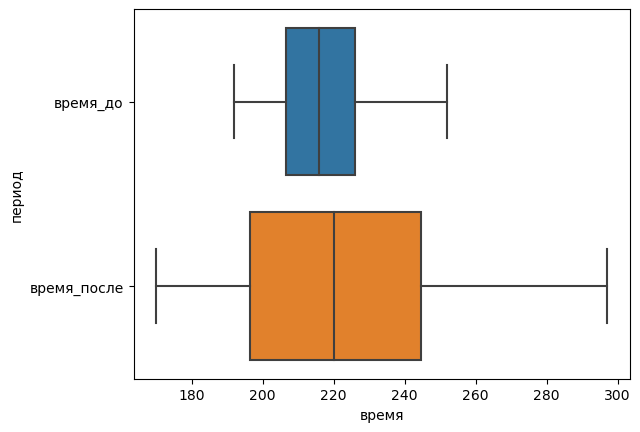

In [31]:
column = input()
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df[df['регион'] == column]
df = df[['время_до', 'время_после']]
df = df.melt(value_name='время', var_name='период')
sns.boxplot(x='время', y='период', data=df)
plt.show()
#plt.savefig('target_5_5.png')

**********************************************************************************************

In [34]:
df = pd.read_csv(PATH_OUT + '\\t_51.csv',sep=';', encoding='cp1251', skipinitialspace=True)
df.head(3)

,вид_зондирования,"время_зондирования, сек",тип_осложнения_1,тип_осложнения_2,тип_осложнения_3,тип_осложнения_4
0,Классическое,69,да,да,да,да
1,Классическое,78,да,да,да,да
2,Классическое,81,да,да,да,да


In [38]:
df['вид_зондирования'].value_counts()

Двойное эндоскопическое сопровождение    73
Классическое                             47
Name: вид_зондирования, dtype: int64

In [35]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [36]:
phik_overview = df.phik_matrix()#(interval_cols = interval_cols)
phik_overview.round(2)

interval columns not set, guessing: ['время_зондирования, сек']


,вид_зондирования,"время_зондирования, сек",тип_осложнения_1,тип_осложнения_2,тип_осложнения_3,тип_осложнения_4
вид_зондирования,1.00,0.74,0.37,0.00,0.00,0.00
"время_зондирования, сек",0.74,1.00,0.22,0.00,0.14,0.18
тип_осложнения_1,0.37,0.22,1.00,0.42,0.45,0.33
тип_осложнения_2,0.00,0.00,0.42,1.00,0.37,0.58
тип_осложнения_3,0.00,0.14,0.45,0.37,1.00,0.45
тип_осложнения_4,0.00,0.18,0.33,0.58,0.45,1.00


In [ ]:
[['показатель', 'р-уровень'],
 ['тип_осложнения_1', 0.0045],
 ['тип_осложнения_4', 0.3886],
 ['тип_осложнения_2', 0.4974],
 ['тип_осложнения_3', 1.0]]

In [46]:
def graph_cat(df_b, gr):
    
    params = {'axes.labelsize' : 12, 'figure.titlesize': 12,
              'xtick.labelsize': 10, 'ytick.labelsize': 10
             }
    plt.rcParams.update(params)    
    
    colors = sns.color_palette('pastel')[ 0:5 ]
    labls = df[gr].unique()
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle('Анализ "{}" по группе зондирования'.format(gr), fontsize=16)
    axes[0].pie(df_b.loc[df_b['вид_зондирования'] == 'Классическое'][gr].value_counts(), colors = colors, labels = labls, autopct='%.0f%%')
    axes[0].set_title('Классическое зондирование')
    axes[1].pie(df_b.loc[df_b['вид_зондирования'] == 'Двойное эндоскопическое сопровождение'][gr].value_counts(), colors = colors, labels = labls, autopct='%.0f%%')
    axes[1].set_title('Предлагаемое зондирование')

    plt.show()

In [47]:
cat = ['тип_осложнения_1', 'тип_осложнения_2', 'тип_осложнения_3', 'тип_осложнения_4']

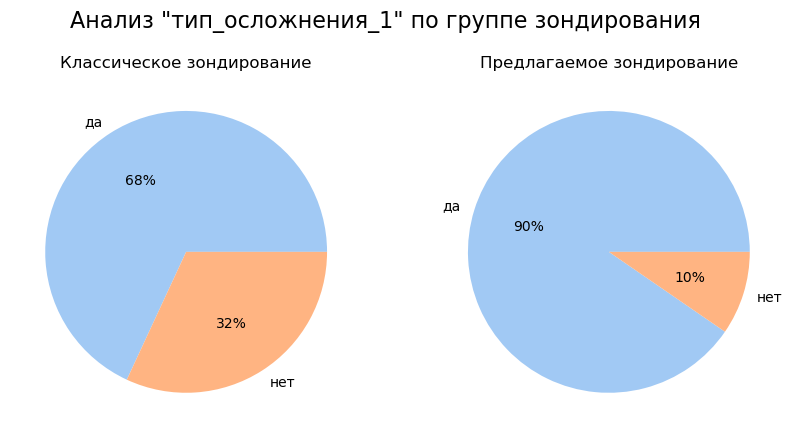

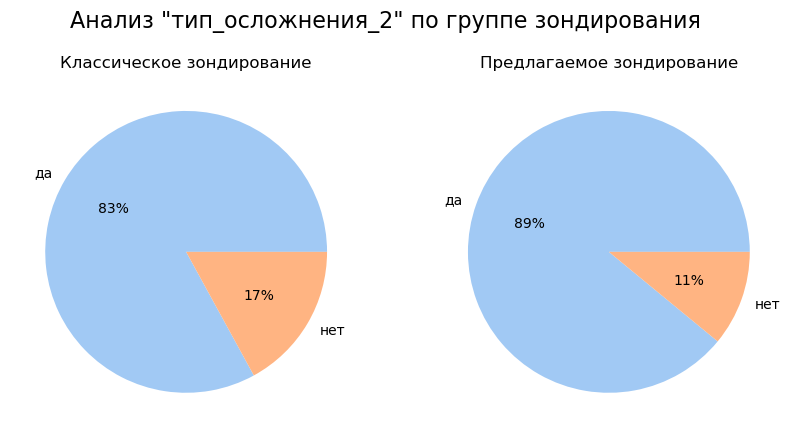

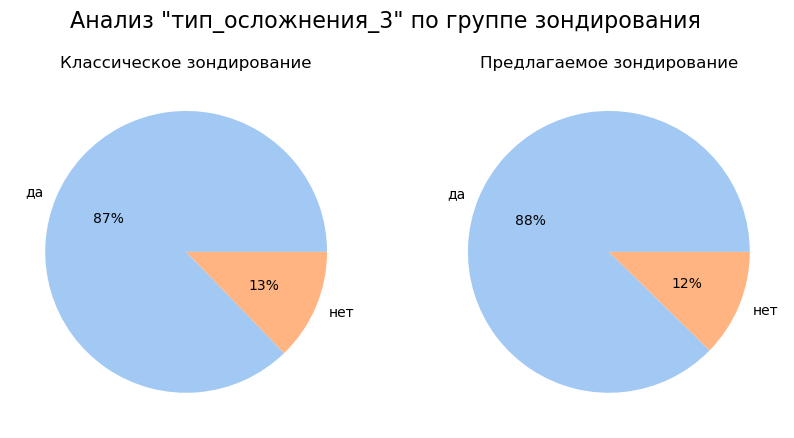

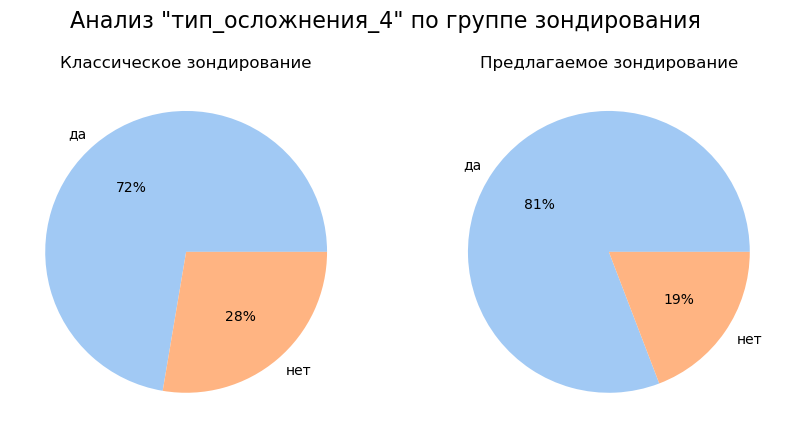

In [48]:
for i in cat:
    graph_cat(df, i)

******************************************************************************************************************

In [53]:
num = df.select_dtypes(exclude=[object]).columns

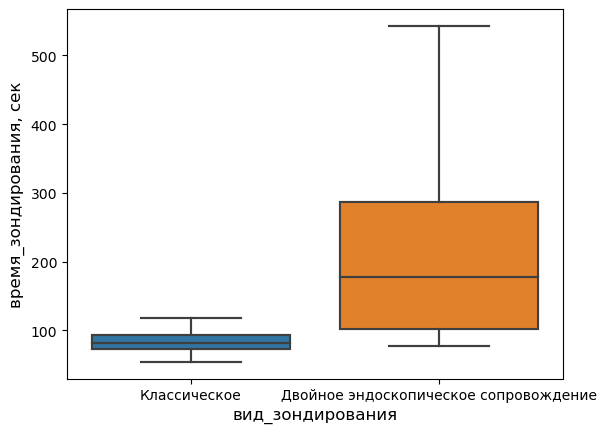

In [57]:
sns.boxplot(x='вид_зондирования', y='время_зондирования, сек', data=df)
plt.show()

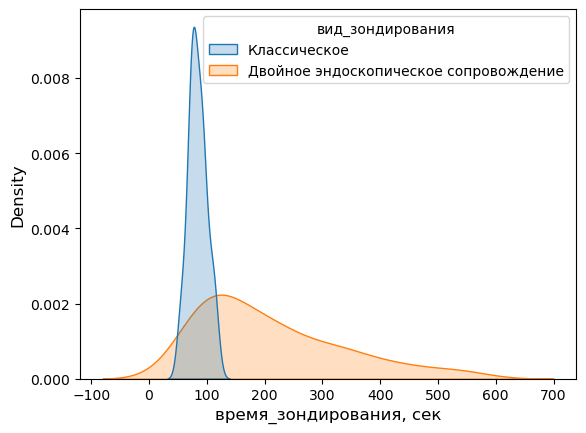

In [59]:
sns.kdeplot(df, x='время_зондирования, сек', hue="вид_зондирования", fill=True)
plt.show()

In [63]:
g1 = df[df['вид_зондирования'] == 'Классическое']['время_зондирования, сек']
g2 = df[df['вид_зондирования'] == 'Двойное эндоскопическое сопровождение']['время_зондирования, сек']

mannwhitneyu(g1, g2, alternative='two-sided')

MannwhitneyuResult(statistic=259.5, pvalue=5.002805116953718e-15)

In [ ]:
тип_сайта  1 или 2
действие да/нет (0/1)

A/B-тестирование

А. Версия сайта 1. просмотр: 4000, покупок 500
В. Версия сайта 2. просмотр: 5745, покупок 671

Какая версия сайта эффетивенее?

proportions_ztest


In [ ]:
import sweetviz as sv
report_1 = sv.analyze(data_full, 'target_temp')

report_1.show_notebook()

In [ ]:
https://dtf.ru/gamedev/1270463-semeistvo-testov-hi-kvadrat-chto-u-nih-pod-kapotom-i-kakie-vybrat-dlya-sravneniya-voronok

В домашнем задании после темы 1 вы разбирали задачу про качество услуг в области глемпинга (вид отдыха на природе). Проанализируйте их ещё раз с учётом новых знаний. Сначала фактор 'общая_оценка_качества_предоставленной_услуги’ представьте в виде 2-х групп: плохо и остальные . Какие из перечисленных факторов ['пол', 'возраст', 'путешествует_с_детьми', 'расстояние', 'включён_завтрак', 'наличие_wifi'] влияют на общее качество услуг. Задачу решите с помощью методов проверки гипотез у себя на компьютере. Ход решения - какой посчитаете нужным. Здесь у вас полная свобода действий.
По результатам проведённого анализа, выберите подходящий для дальнейшей работы ответ.


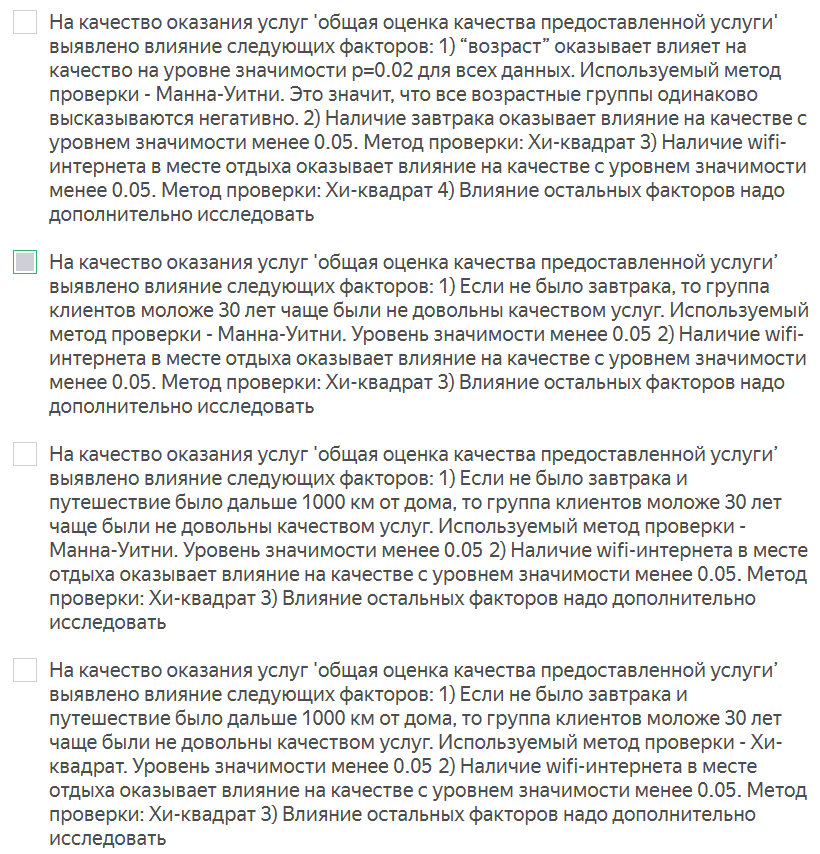